In [2]:
from IPython.display import Image

import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots


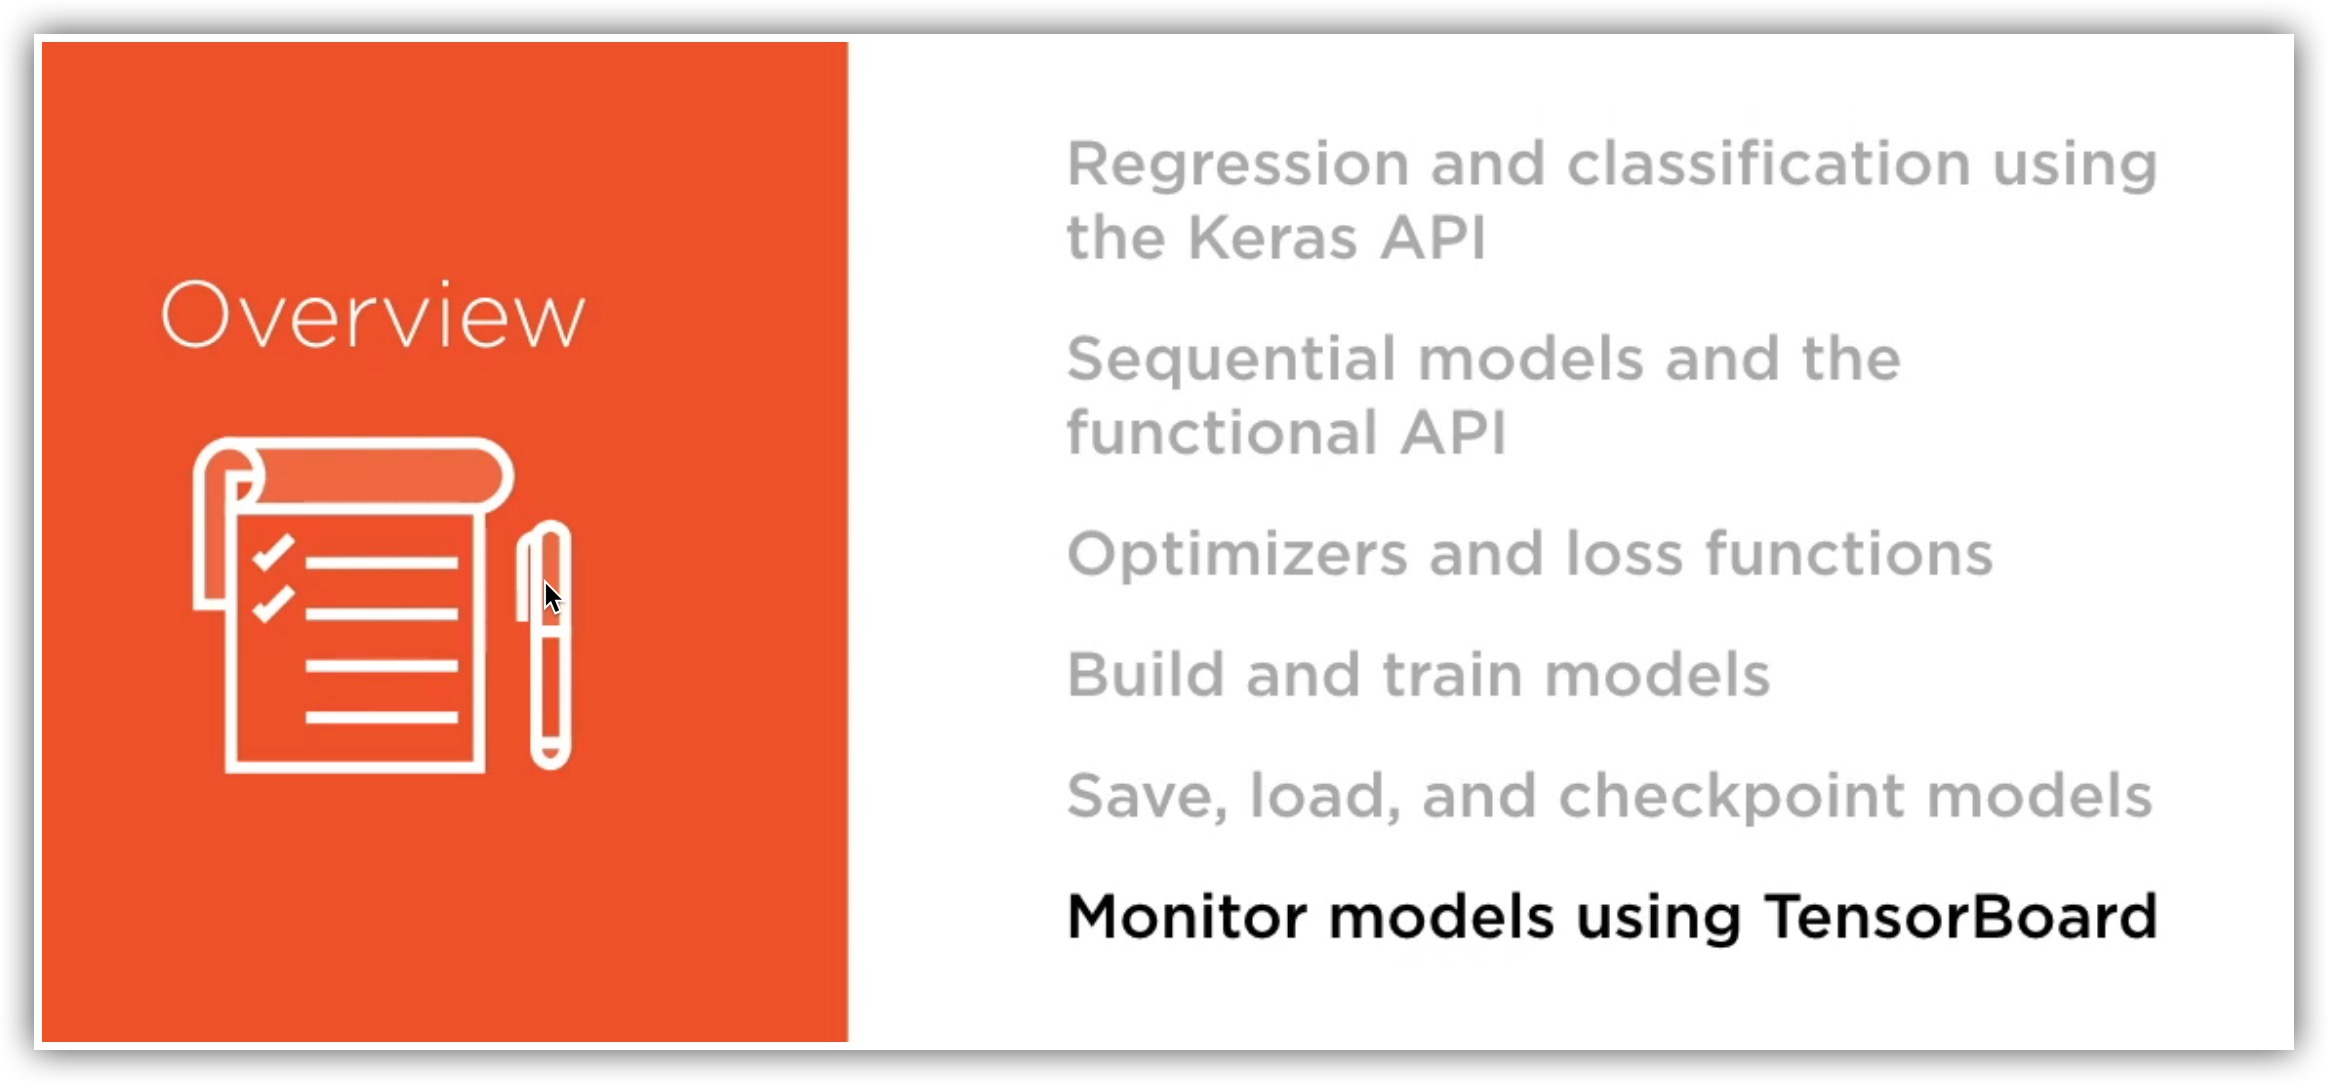

In [3]:
'''
We'll build and train both a regression model, as well as a classification model using Keras. 
We'll see how we can use sequential models, which is just a linear stack of layers. 

We'll also build and train a model using the functional API. 
For each of these models, before we start the training process, we'll configure the parameters for this
model including optimizers and the loss functions. 

We'll then build and train these models using the fit API in Keras.

Once we have a fully trained model, we'll see how we can serialize the model out to disk and 
reload from a previously saved model to use a model for prediction. 

And finally, we'll round this module off by seeing how we can monitor models using TensorBoard.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_11-20-26.jpg')

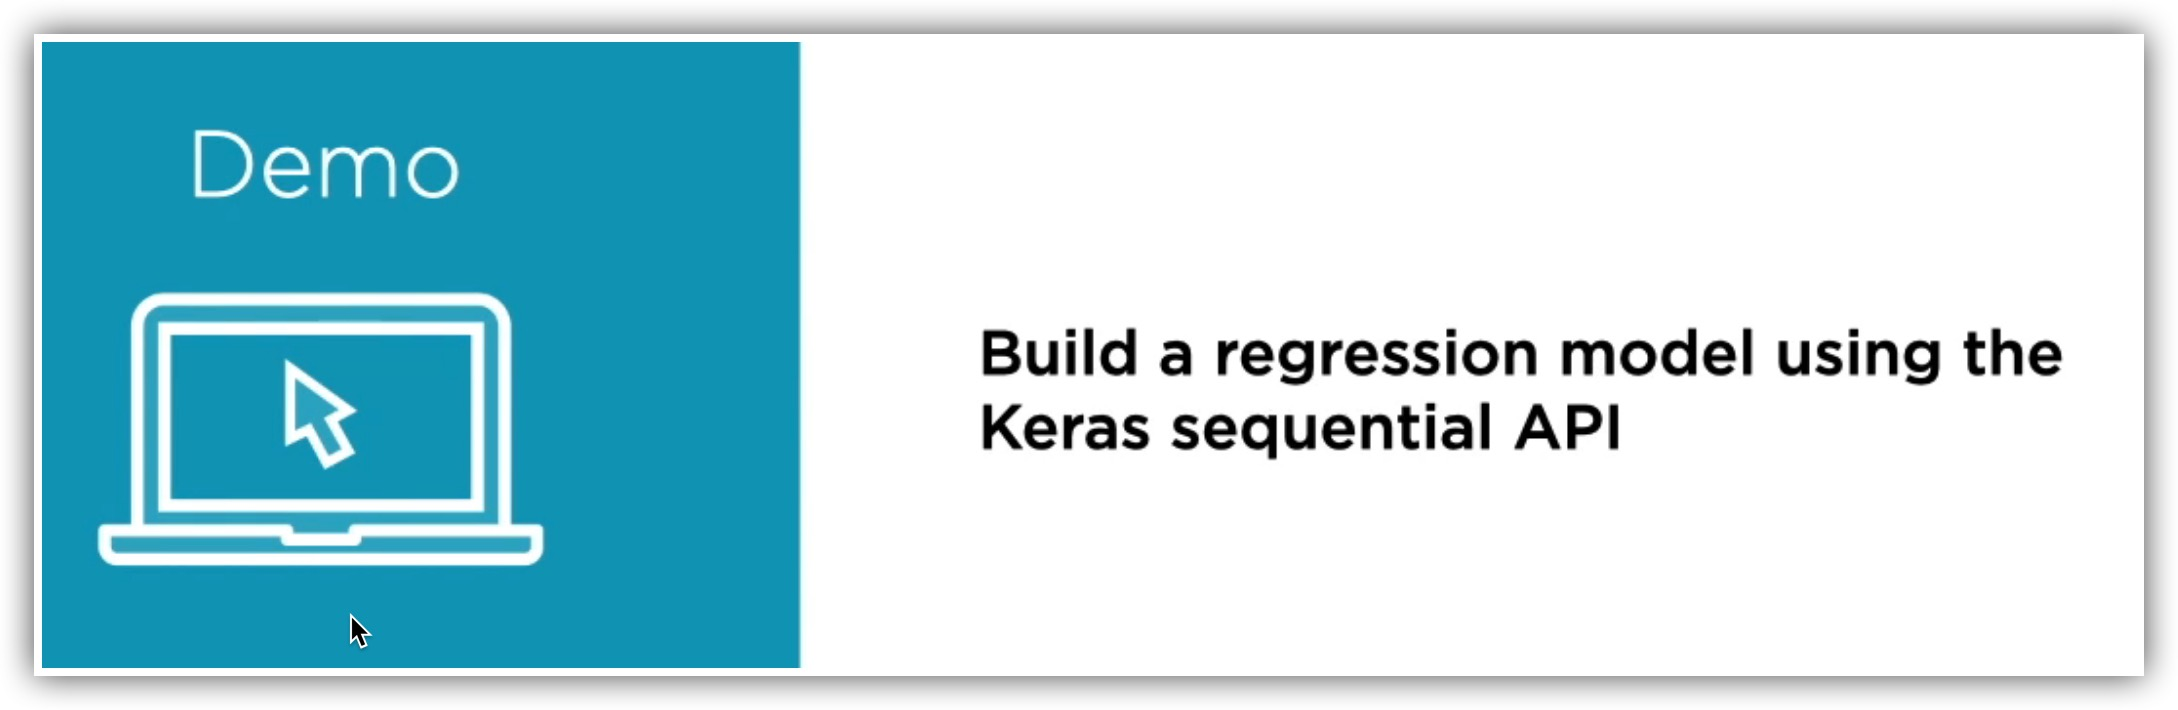

In [4]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_11-21-12.jpg')

In [3]:
'''
We discussed earlier that Keras offers a high‑level API for us to build and train deep 
learning models using any backend and Tensorflow is one of the backends that Keras supports. 
'''
keras.__version__

'2.12.0'

In [4]:
from tabulate import tabulate
def DisplayMatrix(M):
    print(tabulate(M, headers='keys', tablefmt='double_grid'))

In [7]:
'''
 The records in this insurance dataset gives us the characteristics of various individuals within 
 a country and the insurance charges that they've been charged. 
 
 We have the age, sex, BMI, number of children, whether the individual is a smoker or not, and their region. 
 
 We'll use these features to predict the insurance charges, that is the last column here, 
 that are applied to an individual.
'''
data =pd.read_csv('./datasets/insurance.csv')
DisplayMatrix(data.sample(10))

#https://www.kaggle.com/datasets/mirichoi0218/insurance

╔══════╦═══════╦════════╦════════╦════════════╦══════════╦═══════════╦═══════════╗
║      ║   age ║ sex    ║    bmi ║   children ║ smoker   ║ region    ║   charges ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║ 1079 ║    63 ║ male   ║ 33.66  ║          3 ║ no       ║ southeast ║  15161.5  ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║  580 ║    59 ║ male   ║ 25.46  ║          1 ║ no       ║ northeast ║  12914    ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║  103 ║    61 ║ female ║ 29.92  ║          3 ║ yes      ║ southeast ║  30942.2  ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║ 1309 ║    41 ║ male   ║ 32.2   ║          2 ║ no       ║ southwest ║   6875.96 ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║  858 ║    25 ║ female ║ 32.23  ║          1 ║ no       ║ southeast ║  18218.2  ║
╠═══

In [8]:
data.shape

(1338, 7)

In [9]:
'''
The data itself is fairly clean. There are no null or missing values. 
Data.isna() sum will show you zeros for all columns.
'''
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
'''
We can get a quick statistical overview of the numeric columns that exist in our dataset 
using the describe function in Pandas. 

You can see the mean and standard deviation for age, BMI, and charges are all very different. 
Age and BMI are features and charges is the target of our regression, which means our 
features need to be preprocessed.
'''

data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [11]:
'''
Let's move on to sex or gender, which is a categorical variable. 
You can see that we have roughly an equal number of males and females in this dataset.
'''
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
'''
Let's look at smoker, and here you can see that the data is a little skewed. 
We have more non‑smokers than smokers in our data. 
'''
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
'''
The region categorical variable will tell us how individuals are spread across the 
country and you can see that individuals are evenly distributed.
'''
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

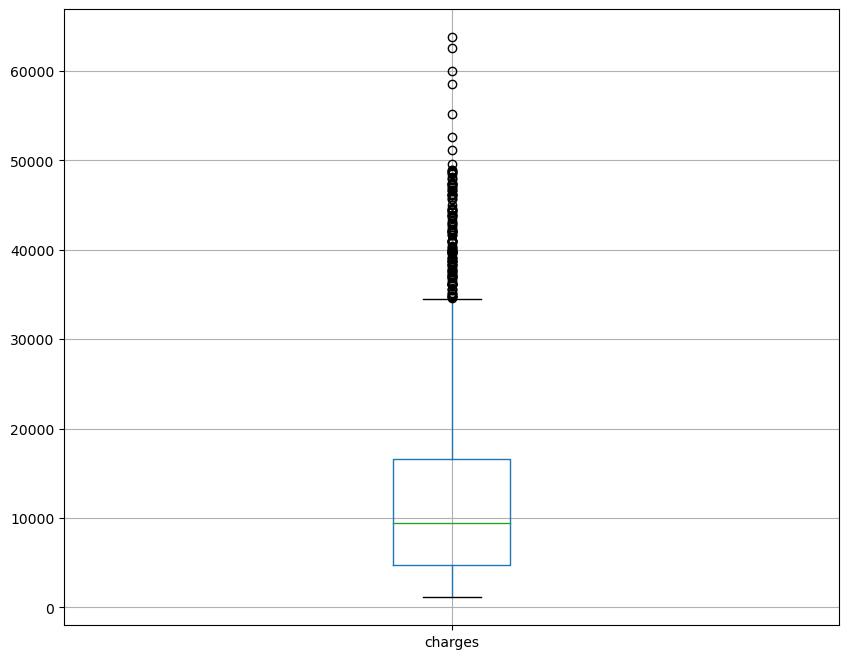

In [16]:
'''
Let's quickly see how insurance charges are distributed by taking a look at a box plot of 
insurance charges. 

You can see that most individuals have insurance charges in the range 5,000 to maybe under $20,000. 

The box here represents the interquartile range of our charges data, and you can see that the 
median is somewhere under $10,000, but there are several outliers, individuals who paid 
between 35 and $80,000 in insurance each year. 
'''
plt.figure(figsize=(10, 8))
data.boxplot(column='charges')
plt.show()

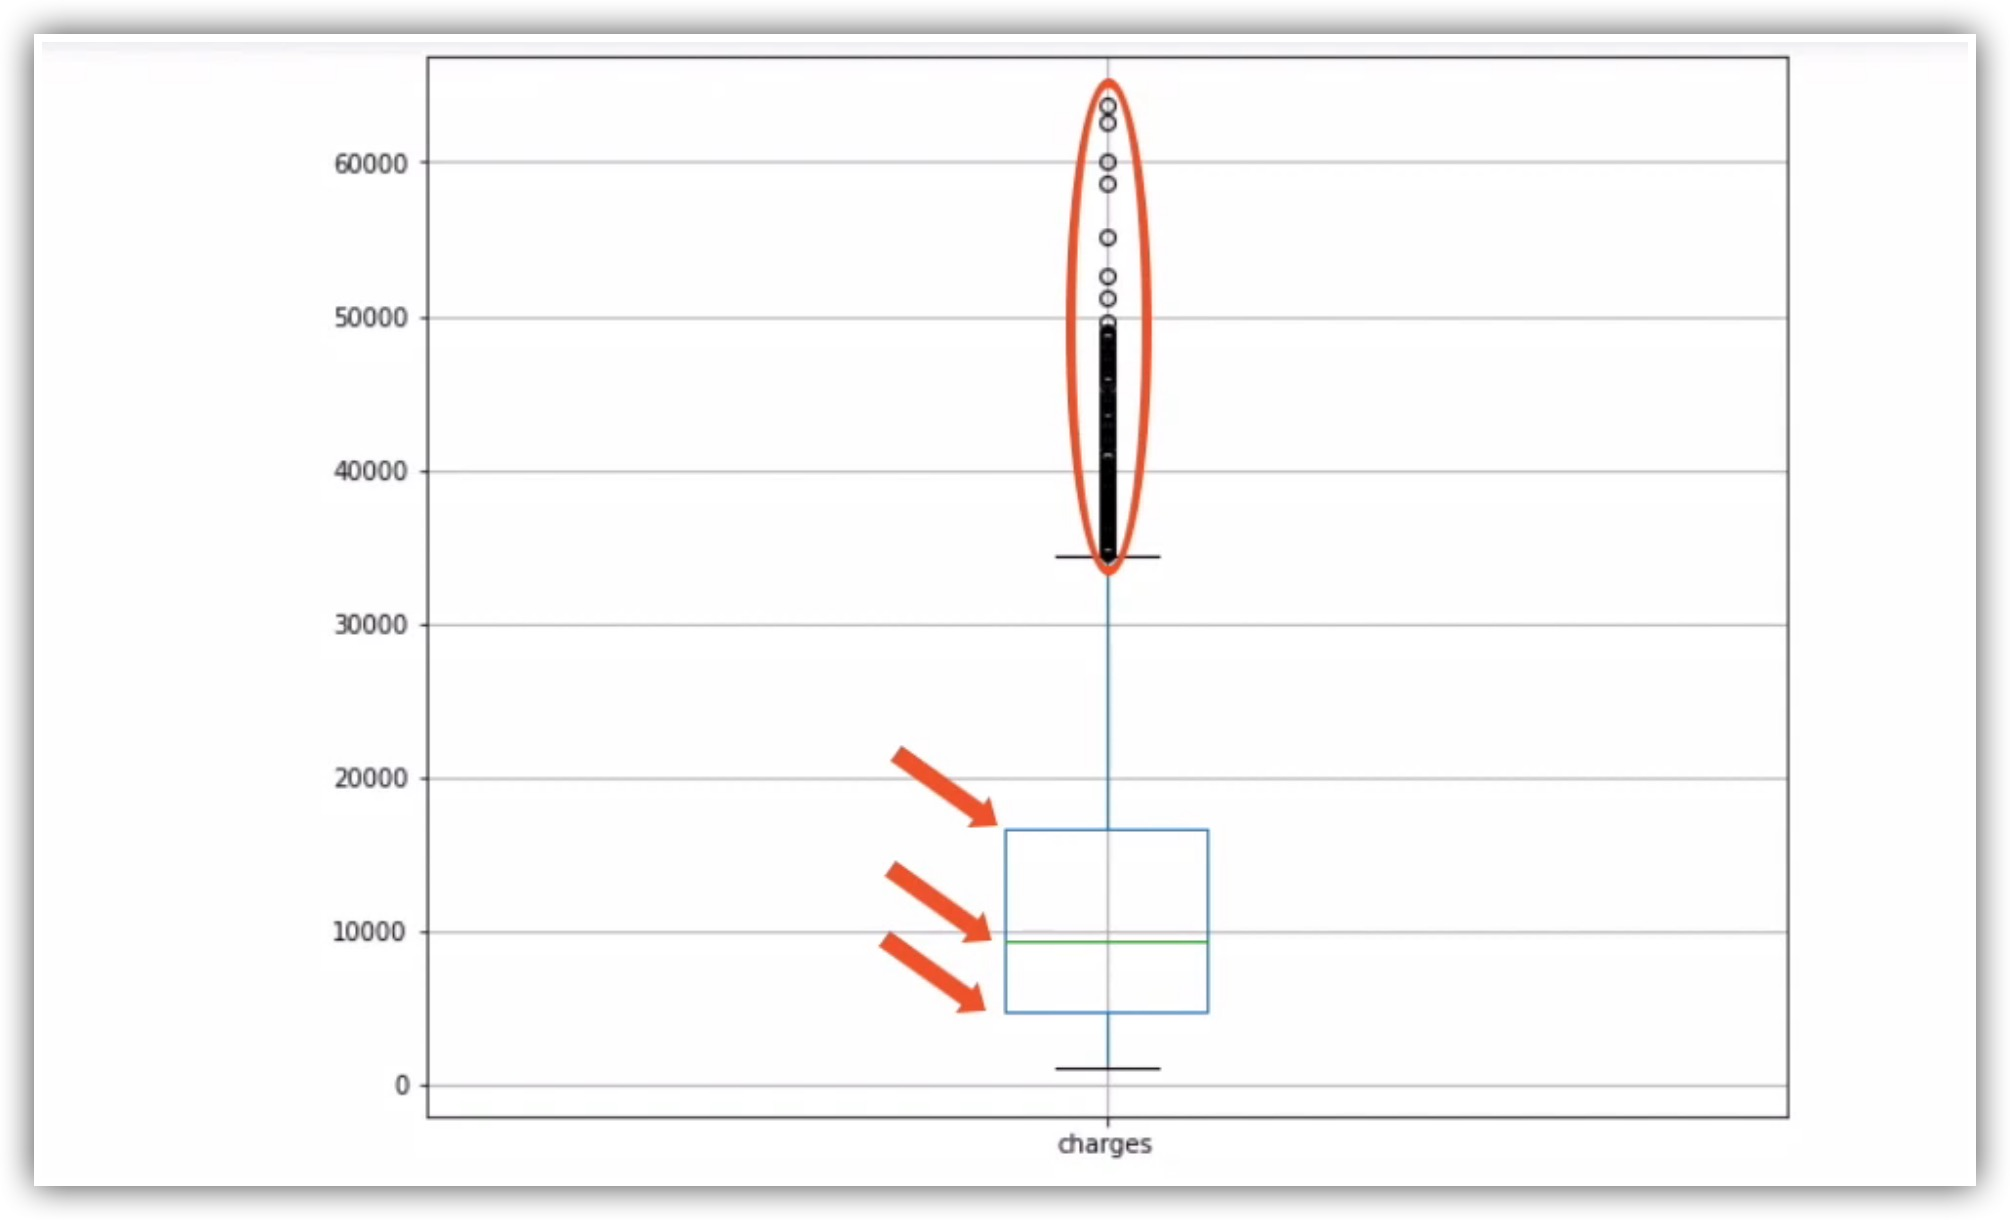

In [17]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_12-11-39.jpg')

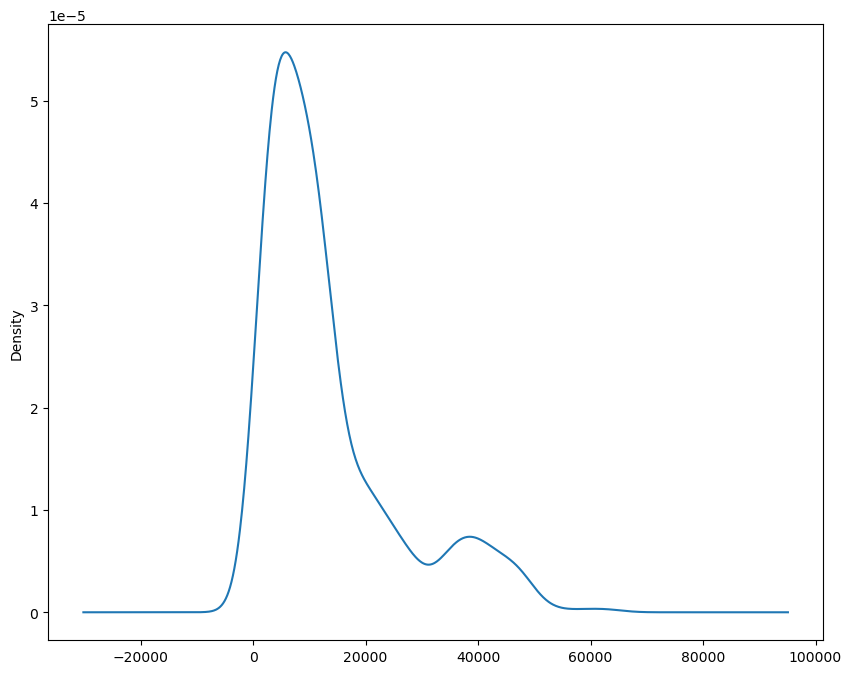

In [18]:
'''
 Another visualisation technique that is useful when working with univariate data in order to 
 view distributions is the kernel density estimation, the KDE curve. The KDE curve gives us 
 a probability distribution of our data, and you can see that the curve for charges has two peaks. 
 
 Most records are at around the $10,000 range, but there is a spike at around the $40,000 range.
'''
plt.figure(figsize=(10, 8))
data['charges'].plot(kind='kde')
plt.show()

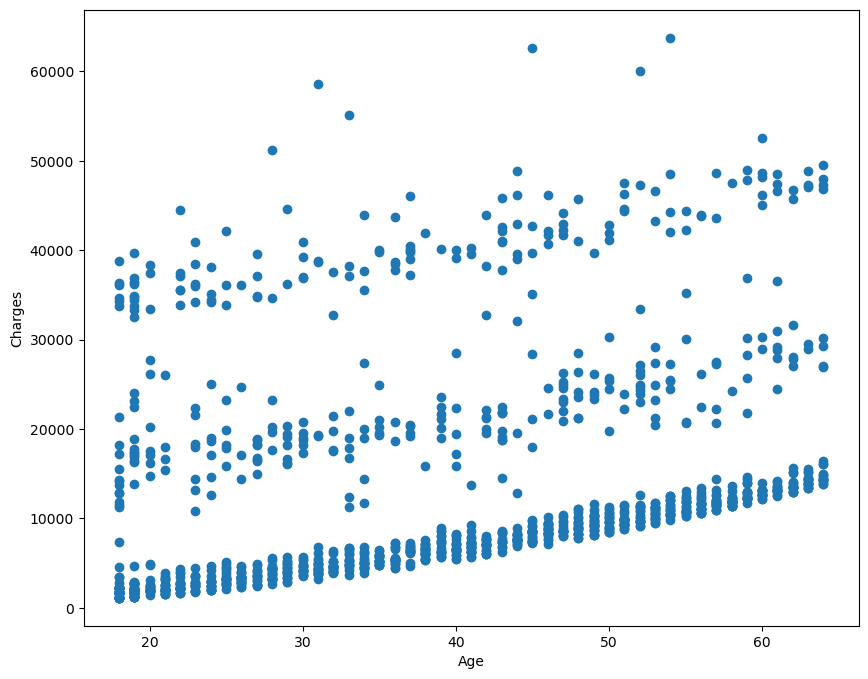

In [19]:
'''
If you want to view the bivariant relationships that exist in your data, the scatter 
plot is a great visualization. 

Here is a scatter plot of age versus insurance charges. There are some clear patterns visible here, 
but in general, as age rises, insurance charges seem to rise. 
'''
plt.figure(figsize=(10, 8))
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [20]:
'''
I'm going to extract all of the features here, which includes all columns, except the charges 
column into the features data frame, and I'll hold the charges in the target data frame.
'''
features = data.drop('charges', axis=1)
target = data[['charges']]

In [21]:
'''
The preprocessing that I'll perform on categorical features in our data will be a little different 
as we'll extract these separately into another data frame called categorical_features, 
which contains sex, smoker, and region. 
'''
categorical_features=features[['sex', 'smoker', 'region']].copy()
DisplayMatrix(categorical_features.head())

╔════╦════════╦══════════╦═══════════╗
║    ║ sex    ║ smoker   ║ region    ║
╠════╬════════╬══════════╬═══════════╣
║  0 ║ female ║ yes      ║ southwest ║
╠════╬════════╬══════════╬═══════════╣
║  1 ║ male   ║ no       ║ southeast ║
╠════╬════════╬══════════╬═══════════╣
║  2 ║ male   ║ no       ║ southeast ║
╠════╬════════╬══════════╬═══════════╣
║  3 ║ male   ║ no       ║ northwest ║
╠════╬════════╬══════════╬═══════════╣
║  4 ║ male   ║ no       ║ northwest ║
╚════╩════════╩══════════╩═══════════╝


In [22]:
'''
Similarly, to perform processing on numeric features, I'll pull these out into a separate 
data frame called numeric features. Age, BMI, and children are what I consider numeric features. 
'''
numeric_features=features.drop(['sex', 'smoker', 'region'],axis=1)
DisplayMatrix(numeric_features.head())

╔════╦═══════╦════════╦════════════╗
║    ║   age ║    bmi ║   children ║
╠════╬═══════╬════════╬════════════╣
║  0 ║    19 ║ 27.9   ║          0 ║
╠════╬═══════╬════════╬════════════╣
║  1 ║    18 ║ 33.77  ║          1 ║
╠════╬═══════╬════════╬════════════╣
║  2 ║    28 ║ 33     ║          3 ║
╠════╬═══════╬════════╬════════════╣
║  3 ║    33 ║ 22.705 ║          0 ║
╠════╬═══════╬════════╬════════════╣
║  4 ║    32 ║ 28.88  ║          0 ║
╚════╩═══════╩════════╩════════════╝


In [23]:
'''
Machine learning models, as you know, can only work with numeric data, so I'm going to 
encode female and male values using numbers 0 and 1. 

I'll replace the values in the sex column using 0 and 1, 0 for female, 1 for male. 
Using a dictionary, I've label encoded my gender data.
'''

gender_dict={'female':0,'male':1}
categorical_features['sex'].replace(gender_dict,inplace=True)
DisplayMatrix(categorical_features.head())

╔════╦═══════╦══════════╦═══════════╗
║    ║   sex ║ smoker   ║ region    ║
╠════╬═══════╬══════════╬═══════════╣
║  0 ║     0 ║ yes      ║ southwest ║
╠════╬═══════╬══════════╬═══════════╣
║  1 ║     1 ║ no       ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  2 ║     1 ║ no       ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  3 ║     1 ║ no       ║ northwest ║
╠════╬═══════╬══════════╬═══════════╣
║  4 ║     1 ║ no       ║ northwest ║
╚════╩═══════╩══════════╩═══════════╝


In [24]:
'''
 Let's apply label encoding to the smoker data as well. Null is 0 and yes is 1. 
 I'll use the replace/inplace function, and here is my smoker data nicely label encoded.
'''
smoker_dict={'no':0,'yes':1}
categorical_features['smoker'].replace(smoker_dict,inplace=True)
DisplayMatrix(categorical_features.head())

╔════╦═══════╦══════════╦═══════════╗
║    ║   sex ║   smoker ║ region    ║
╠════╬═══════╬══════════╬═══════════╣
║  0 ║     0 ║        1 ║ southwest ║
╠════╬═══════╬══════════╬═══════════╣
║  1 ║     1 ║        0 ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  2 ║     1 ║        0 ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  3 ║     1 ║        0 ║ northwest ║
╠════╬═══════╬══════════╬═══════════╣
║  4 ║     1 ║        0 ║ northwest ║
╚════╩═══════╩══════════╩═══════════╝


In [25]:
'''
 And as for the region column, I'm going to use one‑hot encoding using pd.get_dummies. 
 
 This will give me regions in one‑hot encoded form. The original region column will be replaced. 
 
 We now have four columns to represent the region, region_northeast, northwest, and so on. 
 A value of one in a column indicates that the individual lives in that particular region. 
'''
categorical_features=pd.get_dummies(categorical_features,columns=['region'])
DisplayMatrix(categorical_features.head())

╔════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╗
║    ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  0 ║     0 ║        1 ║                  0 ║                  0 ║                  0 ║                  1 ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  1 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  2 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  3 ║    

In [26]:
'''
 If you look at a statistical overview of the numeric features that we have using the describe function, 
 you can see that the means and standard deviations are very different across our numeric features. 
 Our numeric features have very different ranges as well. 
'''
numeric_features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [27]:
'''
Now with numeric features, a good practice is to standardize your data so that they have a 
mean of 0 and a variance of 1. 

The standardScalar estimator object in scikit‑learn performs exactly this operation we call 
standardScalar.fit_transform on our numeric features and generate a new data frame with the standardized values.

After standardization, you can see that all of our numeric features have means very close to 0, 
that is there centered around 0 and have standard deviations very close to 1, they have unit variants. 
'''
standardScaler=StandardScaler()
numeric_features=pd.DataFrame(standardScaler.fit_transform(numeric_features),
                              columns=numeric_features.columns,
                              index=numeric_features.index)
DisplayMatrix(numeric_features.head())

╔════╦═══════════╦═══════════╦════════════╗
║    ║       age ║       bmi ║   children ║
╠════╬═══════════╬═══════════╬════════════╣
║  0 ║ -1.43876  ║ -0.45332  ║ -0.908614  ║
╠════╬═══════════╬═══════════╬════════════╣
║  1 ║ -1.50997  ║  0.509621 ║ -0.0787672 ║
╠════╬═══════════╬═══════════╬════════════╣
║  2 ║ -0.797954 ║  0.383307 ║  1.58093   ║
╠════╬═══════════╬═══════════╬════════════╣
║  3 ║ -0.441948 ║ -1.30553  ║ -0.908614  ║
╠════╬═══════════╬═══════════╬════════════╣
║  4 ║ -0.513149 ║ -0.292556 ║ -0.908614  ║
╚════╩═══════════╩═══════════╩════════════╝


In [28]:
'''
his completes the preprocessing of our features for our regression model. 
I'm going to put the process features together into a single data frame called processed_features. 

If you look at the data frame, it now looks very different. 
These are the features that we'll use to train our model. 
'''

processed_features=pd.concat([numeric_features,categorical_features],axis=1,sort=False)
DisplayMatrix(processed_features.head())

╔════╦═══════════╦═══════════╦════════════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╗
║    ║       age ║       bmi ║   children ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  0 ║ -1.43876  ║ -0.45332  ║ -0.908614  ║     0 ║        1 ║                  0 ║                  0 ║                  0 ║                  1 ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  1 ║ -1.50997  ║  0.509621 ║ -0.0787672 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬══════════════

In [30]:
'''
 I'll put the process features and the target into a single data frame called processed_data. 
 This contains the process features,

 And once we've performed processing, I'm going to write this process data out to a new 
 CSV file called insurance_processed.csv. 
'''

processed_data=pd.concat([processed_features,target],axis=1,sort=False)
DisplayMatrix(processed_data.head())


╔════╦═══════════╦═══════════╦════════════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╦═══════════╗
║    ║       age ║       bmi ║   children ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║   charges ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╬═══════════╣
║  0 ║ -1.43876  ║ -0.45332  ║ -0.908614  ║     0 ║        1 ║                  0 ║                  0 ║                  0 ║                  1 ║  16884.9  ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╬═══════════╣
║  1 ║ -1.50997  ║  0.509621 ║ -0.0787672 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║   1725.55 ║
╠════╬═══════════╬═══════════╬════════════╬═══

In [31]:
processed_data.to_csv('./datasets/insurance_processed.csv',index=False)